## Part1- Exploratory data analysis

In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [145]:
df = pd.read_json('/Users/parisahojjatnia/Documents/Python/ultimate_challenge/logins.json',)
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [146]:
#We resample the time series dataframe in 15-minute intervals then aggregate it by count.

In [147]:
#resampling df to 15-minute intervals
df_logins = df.resample("15min", on="login_time").count()

#cleaning up df
df_logins.index.name = "idx"
df_logins.reset_index(inplace=True)
df_logins.rename({"login_time":"logins"}, axis=1, inplace=True)

#show
df_logins.head()

,idx,logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


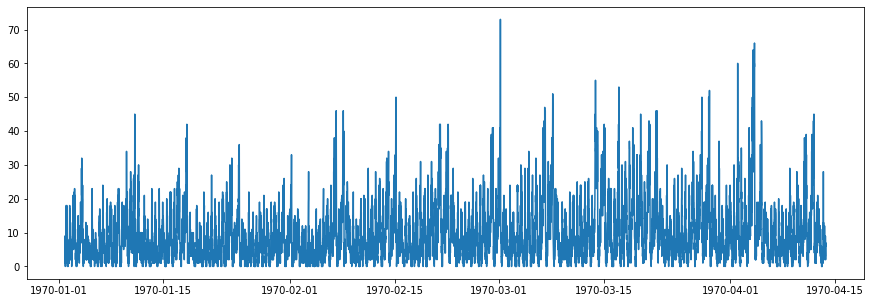

In [148]:
fig, ax = plt.subplots(figsize = (15,5))
plt.plot(df_logins.idx, df_logins.logins)



In [149]:
#extracting hours and days
df_logins["hour"] = df_logins["idx"].dt.hour
df_logins["day"] = df_logins["idx"].dt.day_name()

#giving AM/PM labels
day_or_night = lambda row: "AM" if row in range(0,12) else "PM"
df_logins["AM-PM"] = df_logins["hour"].apply(day_or_night)


In [150]:
df_logins.head()


,idx,logins,hour,day,AM-PM
0,1970-01-01 20:00:00,2,20,Thursday,PM
1,1970-01-01 20:15:00,6,20,Thursday,PM
2,1970-01-01 20:30:00,9,20,Thursday,PM
3,1970-01-01 20:45:00,7,20,Thursday,PM
4,1970-01-01 21:00:00,1,21,Thursday,PM


In [151]:
#getting total logins per day of week
df_day = df_logins.groupby("day").sum()[["logins"]]

#getting average daily logins per day of week
df_day["daily_avg"] = df_logins.groupby("day").mean()[["logins"]]

df_day.reset_index(inplace=True)


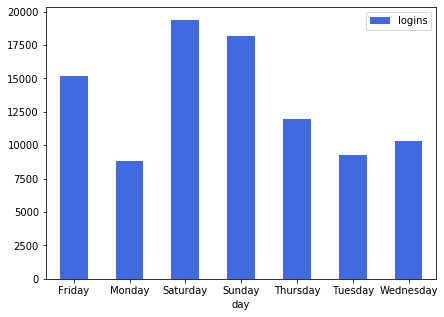

In [152]:
ax = df_day.plot.bar(x='day', y='logins', rot=0, figsize=(7,5), color="royalblue")

In [153]:
#getting total logins per hour
df_hour = df_logins.groupby("hour").sum()[["logins"]]

#getting average hourly logins per hour of day
df_hour["hourly_avg"] = df_logins.groupby("hour").mean()[["logins"]]

df_hour.reset_index(inplace=True)


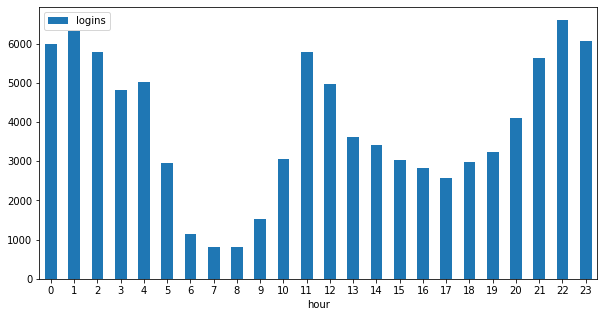

In [154]:
ax = df_hour.plot.bar(x='hour', y='logins', rot=0, figsize=(10,5))

In [155]:
#aggregating by sum
df_total = df_logins.groupby(["day", "AM-PM"]).sum()[["logins"]]

#aggregating by mean
df_total["total_avg"] = df_logins.groupby(["day", "AM-PM"]).mean()[["logins"]]

df_total


logins  total_avg
day       AM-PM                   
Friday    AM       5924   8.227778
          PM       9284  12.894444
Monday    AM       3905   5.423611
          PM       4918   7.025714
Saturday  AM      10217  14.190278
          PM       9160  12.722222
Sunday    AM      10351  14.376389
          PM       7816  10.855556
Thursday  AM       5153   7.668155
          PM       6807   9.893895
Tuesday   AM       3961   5.894345
          PM       5307   7.897321
Wednesday AM       4570   6.800595
          PM       5769   8.584821

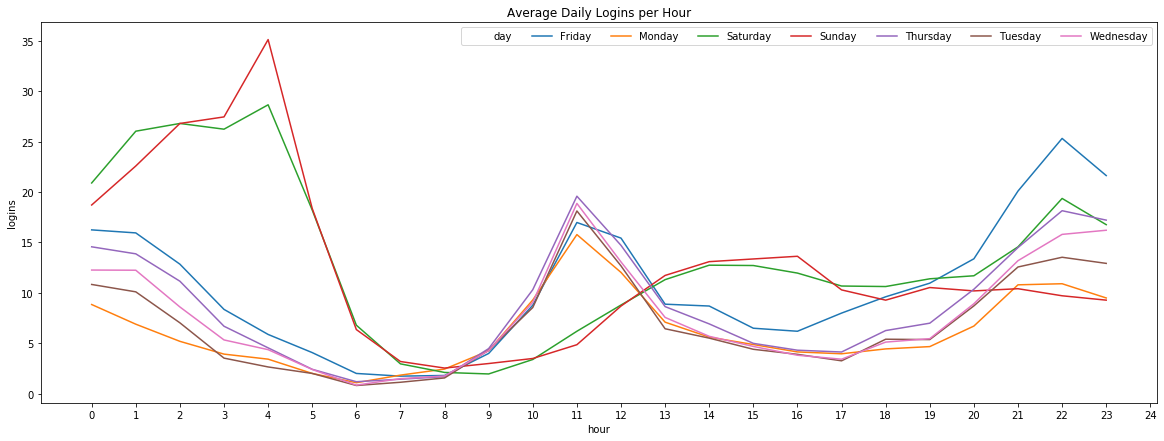

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

#getting average daily logins per hour
df_total = df_logins.groupby(["hour", "day"]).mean().reset_index()

#plotting df
f, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x="hour", y="logins", data=df_total, hue="day")
ax.legend(loc="upper right", ncol=8)
ax.set(title="Average Daily Logins per Hour")
plt.xticks(range(0,25))

#display plot
plt.show()

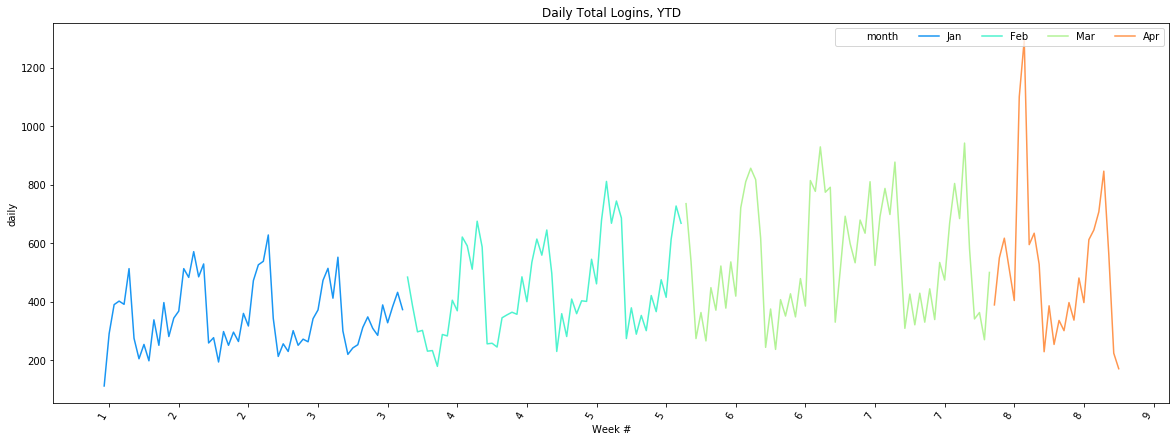

In [157]:
import matplotlib.dates as mdates

#resampling df to daily intervals
df_daily = df.resample("12H", on="login_time").count()

#cleaning up df
df_daily.index.name = "idx"
df_daily.reset_index(inplace=True)
df_daily.rename({"login_time":"daily"}, axis=1, inplace=True)

#extracting months
df_daily["month"] = df_daily["idx"].dt.month
df_daily["month"] = df_daily["month"].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr"})

#plotting df
f, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x="idx", y="daily", data=df_daily, hue="month", palette="rainbow")
ax.legend(loc="upper right", ncol=5)
ax.set(title="Daily Total Logins, YTD", xlabel="Week #")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.set_xticklabels(labels=df_daily["idx"].dt.day, \
                   rotation=60, ha="right")

#display plot
plt.show()

## Part 2 ‑ Experiment and metrics design
### The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
### What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

At the end of the day what is important to Ultimate is the revenue and they want to maximize it anyway.
Studies by ultimate shows that there is an imbalance of demand during different time of the day between two cities.
And Ultimate wants drivers to cross the bridge when there is that imblanace.
So the metric that is good to show the success is the percentage of drivers who passed the bridge in time of high deemand. This metric is choosed because is easy to measure and company already has the info on that.


For performing the experiment correctly we should know exact number of drivers who passed the bridge and paid the toll. And the goal should be what to do to increase this number.
So reimbursing the toll fee will encourage more drivers to pass the bridge.
Comparing the proportion of drivers who passed the bridge with and without paying toll, basically summarized in these two hupothesis:

H1: There is no difference between the mean number of cars entering the bridge from Gotham during weekdays between desired hours, two weeks before reimbursements were offered and the mean number of cars two weeks after reimbursements were offered.

H2: There is an increase in the mean number of cars entering the bridge from Gotham during weekdays between desired hours, two weeks before reimbursements were offered and the mean number of cars two weeks after reimbursements were offered.

I would use a one-tailed Z-test to determine the p-value of each hypothesis.
If the p-value is less than 0.05 for both tests, the reimbursement program continue.
If the p-value is greater than 0.05 for both tests,it shows reimbursement is nit effective. 
If the p-value is mixed, more data is needed,

## Part 3 - Predictive modeling

Ultimate is interested in predicting rider retention. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.


## 1. Data cleaning, exploratory analysis

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

In [29]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [31]:
#load file as JSON
file = open('/Users/parisahojjatnia/Documents/Python/ultimate_challenge/ultimate_data_challenge.json', "r")
dataset = file.read()
file.close()
data = json.loads(dataset)
df = pd.DataFrame(data)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [32]:
from datetime import timedelta
from dateutil import parser

# Get latest date that data was pulled
df['last_trip_date'] = pd.to_datetime(df['last_trip_date']) # convert 'last_trip_date' column to datetime
date_pulled = max(df['last_trip_date']) # get max = approximation of when data was pulled

# Get cutoff for earliest active date to meet "retained" criteria
retain_cutoff = date_pulled - timedelta(days=30)

print("Cut-off for 'retained users': ", retain_cutoff)

Cut-off for 'retained users':  2014-06-01 00:00:00


In [40]:
df_retained = df[df['last_trip_date'] >= retain_cutoff]
print("percent of users retained ", round((len(df_retained) / len(df))*100,2))

percent of users retained  37.61


# 2. Build a predictive model

Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system

In [41]:
# Set up
df['signup_date'] = pd.to_datetime(df['signup_date']) # convert dates to datetime objects
month_6 = df['signup_date'] + timedelta(days=151) # set minimum date of last ride to qualitfy as "active in their 6th mo"

# Get users active in their 6th month in system
active_idx = [idx for idx, s in enumerate(df['last_trip_date']) if s > month_6[idx]] # their their indices in database

# Append data to our database (useful for data viz later)
df['active'] = 0 # set default to 0
df.loc[active_idx, 'active'] = 1 # set active users to 1

print("Number of active users: ", len(active_idx))
print("Number of inactive users: ", len(df) - len(active_idx))
print("Percent active users: ", len(active_idx)/len(df))



Number of active users:  11694
Number of inactive users:  38306
Percent active users:  0.23388


In [42]:
# Convert cities
cities = {'Winterfell': 1, 'Astapor': 2, "King's Landing": 3}
df['city'] = df['city'].map(lambda x: cities[x])

# Convert phones
phones = {"iPhone": 1, "Android": 2}
df['phone'] = df['phone'].map(lambda i: phones[i] if i is not None else 0)

# Convert ultimate black status

df['ultimate_black_user'] = df['ultimate_black_user'].map(lambda b: 1 if b == True else 0)

In [43]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)



In [44]:
df.drop(['surge_pct', 'avg_surge', 'phone', 'last_trip_date', 'signup_date'], inplace=True, axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
city                      50000 non-null int64
trips_in_first_30_days    50000 non-null int64
avg_rating_of_driver      50000 non-null float64
ultimate_black_user       50000 non-null int64
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
active                    50000 non-null int64
dtypes: float64(4), int64(4)
memory usage: 3.1 MB


# 2.1 Modeling

Ultimate's priority is probably to detect whether a customer will not come back again(non-active users) and target those in marketing. 
 So we are probably more concerned about false positives rather than false negatives - it is better to target those that are in risk of not coming back. The worst that could happen is that an 'active' user is incorrectly labeled as 'inactive' and therefore receives targeted ads that an at-risk churner would receive.

In short, we want to minimize our rate of false positives, i.e. minimize number of not active users who are incorrectly predicted to be active users. Since these are the customers that Ultimate are probably actually interested in targeting. We should examine the confusion matrix resulting from each of our ML approaches.
: However, we don't want a situation in which too many 'active' users get annoying ads. Otherwise there might end up being a significant number of them who churn later on. So we should look out for false negatives as well.

In [46]:
from sklearn.preprocessing import MinMaxScaler

x = df.drop('active', axis=1)
y = df['active']

scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.fit_transform(x)


In [47]:
# Split the data into train & test sets before modeling

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99)



## Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Instantiate model
model = LogisticRegression(penalty='l2') # instantiate logreg w/ l1 regularization
model.fit(X_train, y_train)
y_pred = model.predict(x_test)

# Generate confusion matrix
print('Confusion matrix: ')
print(confusion_matrix(y_test, y_pred))

Confusion matrix: 
[[11277   155]
 [ 3328   240]]


As the confusion matrix says155 of users are incorrectly labeld as active. There are also many active users misclassified as non actives (false negatives, 3328). 

Test two methods based on decision trees: 1) regular decision tree, 2) random forest, 4)and pick the one with the best metrics.

In [56]:
#from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer

# Define scorer
def false_total(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    false_p = matrix[0,1]
    false_n = matrix[1,0]
    if ((false_p < 155) & (false_n < 2000)):
        falses = (false_p+false_n)/sum(sum(matrix))
        return falses
    else:
        falses = 1
        return falses

# Make scorer
scorer = make_scorer(false_total, greater_is_better=False)


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Decision tree
score = scorer
tuned_parameters = {'max_depth':range(2,7)}
model = DecisionTreeClassifier(min_samples_split=100, max_features='sqrt', random_state=99)

clf = GridSearchCV(estimator=model, param_grid=tuned_parameters, scoring=scorer, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_, '\n')
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()
print("Detailed classification report:")
y_true, y_pred = y_test, clf.predict(x_test)
print(confusion_matrix(y_true, y_pred), '\n')

Best parameters set found on development set:
{'max_depth': 2} 

Grid scores on development set:
-0.232 (+/-0.000) for {'max_depth': 2}
-1.000 (+/-0.000) for {'max_depth': 3}
-1.000 (+/-0.000) for {'max_depth': 4}
-1.000 (+/-0.000) for {'max_depth': 5}
-1.000 (+/-0.000) for {'max_depth': 6}

Detailed classification report:
[[11432     0]
 [ 3568     0]] 



Although this classifier shows 0 non active users, we have too many 'active' users incorrectly identified as churners. Maybe some active users recieive incorrect ads. We'll move on Random forest.

## Random forest


In [52]:
%%time

from sklearn.ensemble import RandomForestClassifier

score = scorer
tuned_parameters = {'n_estimators':range(20,91,10), 'max_depth':range(2,7), 'min_samples_split':range(100,1000,200)}
model = RandomForestClassifier(random_state=99)

clf = GridSearchCV(estimator=model, param_grid=tuned_parameters, scoring=score, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_, '\n')
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()
print("Detailed classification report:")
y_true, y_pred = y_test, clf.predict(x_test)
print(confusion_matrix(y_true, y_pred), '\n')

Best parameters set found on development set:
{'max_depth': 6, 'min_samples_split': 900, 'n_estimators': 20} 

Grid scores on development set:
-0.232 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 20}
-0.232 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 30}
-0.232 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 40}
-0.232 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 50}
-0.232 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 60}
-0.232 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 70}
-0.232 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 80}
-0.232 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 90}
-0.232 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 300, 'n_estimators': 20}
-0.232 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 300, 'n_estimators': 30}
-0.232 

This is better result, it balances our lowest number of false positives (341, non active users incorrectly identified as 'active') and false negatives (2985, 'active' users incorrectly identified as churned).

## Feature importances

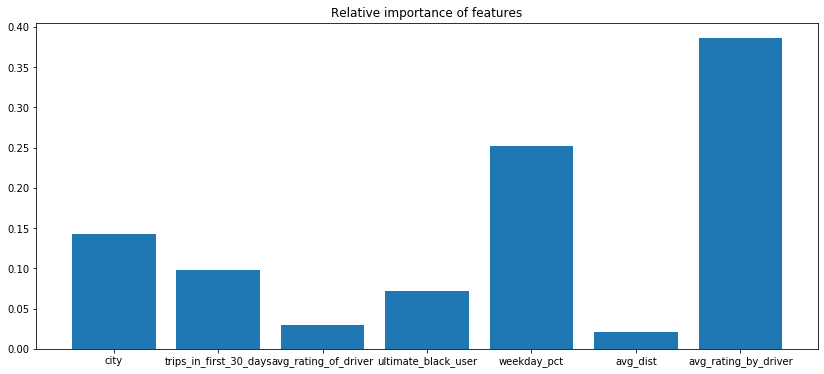

In [55]:
# Recreate our best model
model = RandomForestClassifier(max_depth=6, min_samples_split=900, n_estimators=20, random_state=99)
model.fit(X_train, y_train)
y_true, y_pred = y_test, model.predict(x_test)

# Plot relative importance of features
plt.figure(figsize=(14,6));
plt.bar(df.columns[:-1].tolist(), model.feature_importances_);
plt.title('Relative importance of features');

## Results

Most important features appear to be average rating by driver and percent of user's trips occurring during weekday.


As a result, our model emphasizes minimizing false positives (non active users misclassified as 'active' and thus missed by marketing campaigns), while balancing a reasonable amount of false negatives ('active' users misclassified as non actives who would then get spammed with these marketing campaigns).

Ultimate should do further tests to determine how detrimental these false negatives are - will active users necessarily become not active because they receivespams? And also what is good frequency for advertising and send ads to non active users?